In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
gossip_real = pd.read_csv("Ruru/gossipcop_real.csv")
gossip_fake = pd.read_csv("Ruru/gossipcop_fake.csv")
politifact_real = pd.read_csv("Ruru/politifact_real.csv")
politifact_fake = pd.read_csv("Ruru/politifact_fake.csv")

In [3]:
gossip_real.head(5)

,id,news_url,title,tweet_ids
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...


In [4]:
gossip_fake.head(5)

,id,news_url,title,tweet_ids
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...


In [5]:
politifact_real.head(5)

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...


In [6]:
politifact_fake.head(5)

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...


In [7]:
for df in [gossip_real, politifact_real]:
    df['label'] = 1
for df in [gossip_fake, politifact_fake]:
    df['label'] = 0

In [8]:
df = pd.concat([gossip_real, gossip_fake, politifact_real, politifact_fake], ignore_index=True)
df = df[['title', 'label']].dropna()
df = df.drop_duplicates()

In [9]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [10]:
df['clean_title'] = df['title'].apply(clean_text)

In [11]:
# Sample equal real/fake for balanced training
real = df[df['label'] == 1].sample(5323, random_state=42)
fake = df[df['label'] == 0].sample(5323, random_state=42)
df_balanced = pd.concat([real, fake]).sample(frac=1, random_state=42).reset_index(drop=True)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

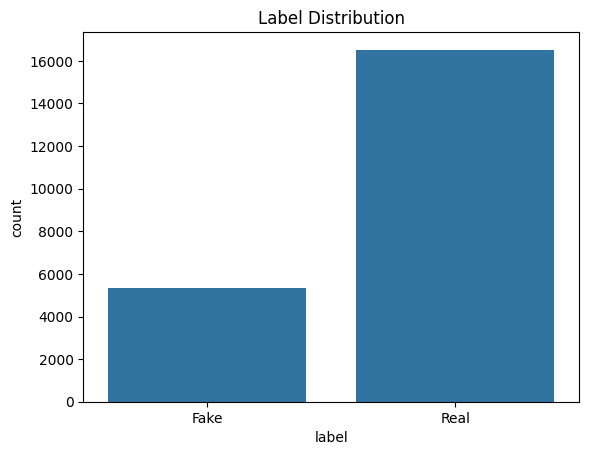

In [13]:
sns.countplot(x='label', data=df)
plt.xticks([0, 1], ['Fake', 'Real'])
plt.title("Label Distribution")
plt.show()

C:\Users\ranja\AppData\Local\Temp\ipykernel_11392\1735630099.py:20: UserWarning: Glyph 129512 (\N{FIRECRACKER}) missing from font(s) DejaVu Sans.
  plt.tight_layout(pad=0)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129512 (\N{FIRECRACKER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


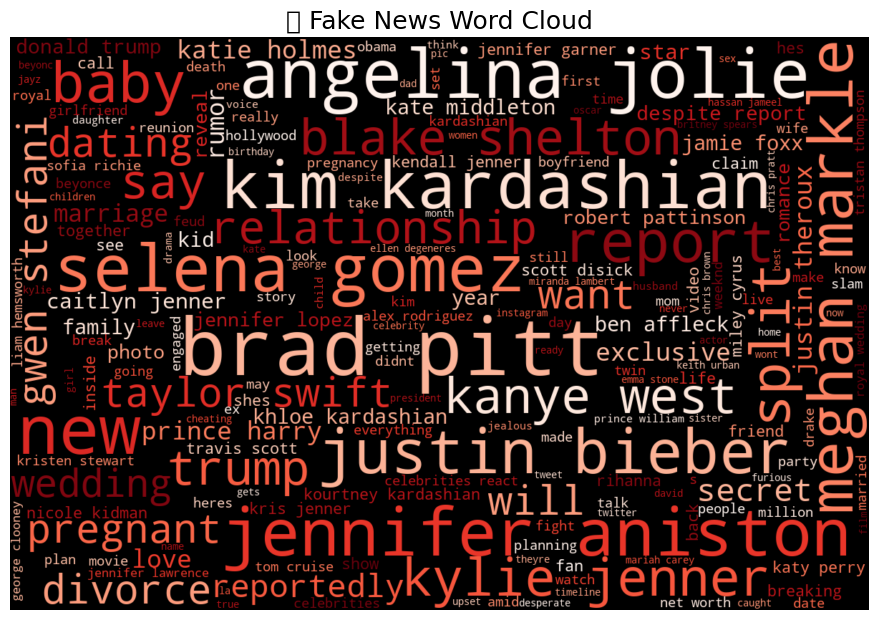

C:\Users\ranja\AppData\Local\Temp\ipykernel_11392\1735630099.py:20: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout(pad=0)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


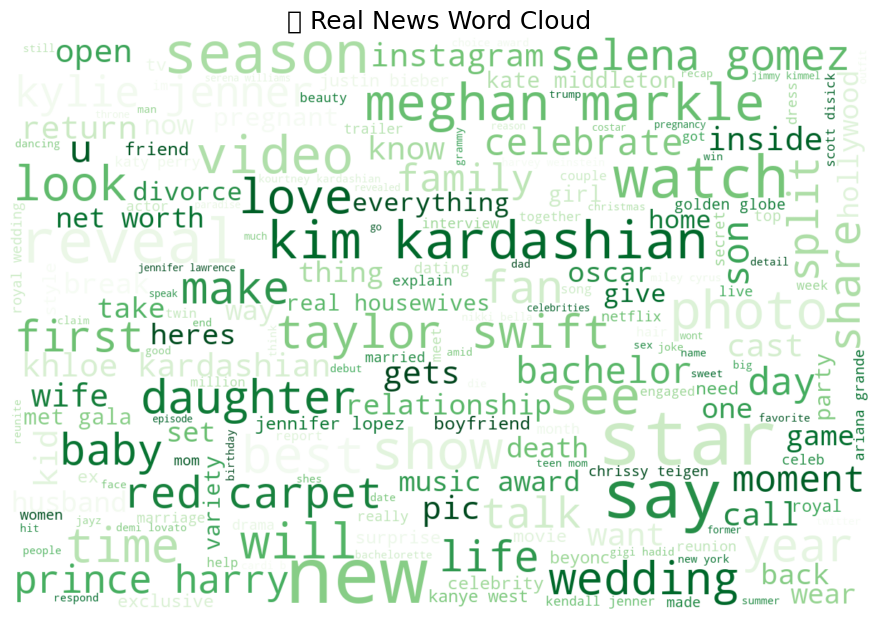

In [14]:
fake_text = " ".join(df[df['label'] == 0]['clean_title'])
real_text = " ".join(df[df['label'] == 1]['clean_title'])


def create_wordcloud(text, title, bg_color, colormap):
    wordcloud = WordCloud(
        stopwords=STOPWORDS,
        background_color=bg_color,
        width=1200,
        height=800,
        colormap=colormap,
        max_words=200,
        max_font_size=110
    ).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=18)
    plt.tight_layout(pad=0)
    plt.show()

    
create_wordcloud(fake_text, "🧨 Fake News Word Cloud", bg_color="black", colormap="Reds")
create_wordcloud(real_text, "✅ Real News Word Cloud", bg_color="white", colormap="Greens")

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report\

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_title"])
y = df["label"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"📊 {name}")
    print("Accuracy:", round(acc, 4))
    print(classification_report(y_test, preds))
    print("-" * 60)

📊 Logistic Regression
Accuracy: 0.8442
              precision    recall  f1-score   support

           0       0.81      0.43      0.56      1016
           1       0.85      0.97      0.91      3354

    accuracy                           0.84      4370
   macro avg       0.83      0.70      0.73      4370
weighted avg       0.84      0.84      0.83      4370

------------------------------------------------------------
📊 Naive Bayes
Accuracy: 0.8318
              precision    recall  f1-score   support

           0       0.80      0.37      0.51      1016
           1       0.84      0.97      0.90      3354

    accuracy                           0.83      4370
   macro avg       0.82      0.67      0.70      4370
weighted avg       0.83      0.83      0.81      4370

------------------------------------------------------------
📊 Random Forest
Accuracy: 0.8297
              precision    recall  f1-score   support

           0       0.72      0.43      0.54      1016
           1

In [22]:
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
with open('fake_news_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("Logistic Regression model and vectorizer saved!")

Logistic Regression model and vectorizer saved!


In [26]:
import pickle
import re

# Load model and vectorizer
with open('fake_news_model.pkl', 'rb') as f:
    final_model = pickle.load(f)

with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Clean text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Sample headlines
samples = [
    "NASA discovers alien life on Mars",
    "Government announces new education policy",
    "BREAKING: Apple to buy Microsoft in 2025",
    "COVID-19 vaccine declared ineffective in new study",
    "Scientists revive extinct species of dinosaur",
    "Narendra Modi inaugurates new airport in Mumbai",
    "Obama secretly converted to Islam, White House insider claims.",
    "India's Banu Mushtaq makes history with International Booker win",
    "5G towers are responsible for COVID-19 spread.",
    "Medical jet with six on board crashes into Philadelphia neighbourhood",
    "IPL cricket match stopped midway in Dharamshala",
     "Indian YouTuber arrested for allegedly 'spying' for Pakistan"
    
]

# Predict
cleaned_samples = [clean_text(text) for text in samples]
sample_vectors = vectorizer.transform(cleaned_samples)

sample_preds = final_model.predict(sample_vectors)
sample_probs = final_model.predict_proba(sample_vectors)

for i, text in enumerate(samples):
    result_label = sample_preds[i]
    confidence = round(max(sample_probs[i]) * 100, 2)
    raw_label = f"LABEL_{result_label}"
    readable_label = "Real" if result_label == 1 else "Fake"

    print(f"RAW OUTPUT: {{'label': '{raw_label}', 'score': {sample_probs[i][result_label]}}}")
    print(f"Headline: {text}")
    print(f"Prediction: {readable_label} (Confidence: {confidence}%)\n")


RAW OUTPUT: {'label': 'LABEL_1', 'score': 0.7639156140258441}
Headline: NASA discovers alien life on Mars
Prediction: Real (Confidence: 76.39%)

RAW OUTPUT: {'label': 'LABEL_1', 'score': 0.908990417483078}
Headline: Government announces new education policy
Prediction: Real (Confidence: 90.9%)

RAW OUTPUT: {'label': 'LABEL_0', 'score': 0.7111620896979891}
Headline: BREAKING: Apple to buy Microsoft in 2025
Prediction: Fake (Confidence: 71.12%)

RAW OUTPUT: {'label': 'LABEL_1', 'score': 0.853532081506117}
Headline: COVID-19 vaccine declared ineffective in new study
Prediction: Real (Confidence: 85.35%)

RAW OUTPUT: {'label': 'LABEL_1', 'score': 0.8385435399937546}
Headline: Scientists revive extinct species of dinosaur
Prediction: Real (Confidence: 83.85%)

RAW OUTPUT: {'label': 'LABEL_1', 'score': 0.7546053836621938}
Headline: Narendra Modi inaugurates new airport in Mumbai
Prediction: Real (Confidence: 75.46%)

RAW OUTPUT: {'label': 'LABEL_0', 'score': 0.6273534258775868}
Headline: Oba

In [27]:
from transformers import pipeline
import torch
from datasets import Dataset

In [28]:
df_bert = df[['clean_title', 'label']].rename(columns={'clean_title': 'text', 'label': 'label'})
dataset = Dataset.from_pandas(df_bert)

In [29]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
from transformers import pipeline
import torch
from datasets import Dataset
# Tokenize dataset
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

dataset = dataset.map(tokenize, batched=True)
dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

Map:   0%|          | 0/21847 [00:00<?, ? examples/s]

In [30]:
from transformers import DataCollatorWithPadding

# This will pad dynamically during training
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


In [31]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
dataset = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = dataset['train']
test_dataset = dataset['test']

In [40]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
from transformers import BertTokenizer
from datasets import Dataset

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    logging_dir="./logs"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset, 
    eval_dataset=test_dataset,
    data_collator=data_collator
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
import torch

print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))

CUDA available: True
GPU Name: NVIDIA GeForce GTX 1650


In [41]:
trainer.train() #not need to run now once trained is enough 

C:\Users\ranja\AppData\Roaming\Python\Python311\site-packages\transformers\utils\generic.py:271: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  arr = np.array(obj)


Step,Training Loss
500,0.490100
1000,0.450100
1500,0.431400
2000,0.430200
2500,0.347200
3000,0.337500
3500,0.325400
4000,0.327500


C:\Users\ranja\AppData\Roaming\Python\Python311\site-packages\transformers\utils\generic.py:271: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  arr = np.array(obj)
C:\Users\ranja\AppData\Roaming\Python\Python311\site-packages\transformers\utils\generic.py:271: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you

TrainOutput(global_step=4370, training_loss=0.38651876558701015, metrics={'train_runtime': 879.6187, 'train_samples_per_second': 39.738, 'train_steps_per_second': 4.968, 'total_flos': 876258994883340.0, 'train_loss': 0.38651876558701015, 'epoch': 2.0})

In [42]:
model.save_pretrained("bert_model_final")
tokenizer.save_pretrained("bert_model_final") # same no need to run again 

('bert_model_final\\tokenizer_config.json',
 'bert_model_final\\special_tokens_map.json',
 'bert_model_final\\vocab.txt',
 'bert_model_final\\added_tokens.json')

In [43]:
from transformers import pipeline, BertForSequenceClassification, BertTokenizer

model = BertForSequenceClassification.from_pretrained("./bert_model_final")
tokenizer = BertTokenizer.from_pretrained("./bert_model_final")

pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)

Device set to use cuda:0


In [44]:
from transformers import pipeline, BertForSequenceClassification, BertTokenizer
import torch
import re

# Clean function (must match training)
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Load model and tokenizer
model = BertForSequenceClassification.from_pretrained("./bert_model_final")
tokenizer = BertTokenizer.from_pretrained("./bert_model_final")

pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)

# Sample headlines
samples = [
    "NASA discovers alien life on Mars",
    "Government announces new education policy",
    "BREAKING: Apple to buy Microsoft in 2025",
    "COVID-19 vaccine declared ineffective in new study",
    "Scientists revive extinct species of dinosaur",
    "Google launches AI that writes entire books",
    "Narendra Modi inaugurates new airport in Mumbai",
    "Trump confronts Ramaphosa with footage after saying white farmers 'fleeing South Africa'",
    "Bail for Indian professor arrested for comments on India-Pakistan conflict",
    "Schools to remain shut in Indian-administered Kashmir",
    "IPL cricket match stopped midway in Dharamshala",
    "5G towe are responsible for COVID-19 spread.",
    "Obama secretly converted to Islam, White House insider claims.",
    "India's Banu Mushtaq makes history with International Booker win",
    "Indian YouTuber arrested for allegedly 'spying' for Pakistan",
    "WHO declares end to COVID-19 global emergency.",
    "Elon Musk's SpaceX completes another successful Starlink mission.",
    "Bill Gates says vaccines will implant microchips in humans.",
    "China bans ketchup to stop Western influence.",
    "Kim Kardashian & Kanye West Reportedly Fighting Over Filming Birth Of Baby #3 For KUWTK",
    "Government Plans to Implant Microchips in All Citizens by 2025",
    "Medical jet with six on board crashes into Philadelphia neighbourhood"

]

# Debug predictions
for text in samples:
    cleaned = clean_text(text)
    result = pipe(cleaned)[0]

    # Print raw result for debugging
    print(f"RAW OUTPUT: {result}")

    # Proper label mapping (check actual label name)
    if result['label'] == 'LABEL_0':
        label = "Fake"
    elif result['label'] == 'LABEL_1':
        label = "Real"
    else:
        label = "Unknown"

    print(f"Headline: {text}")
    print(f"Prediction: {label} (Confidence: {round(result['score'] * 100, 2)}%)\n")

Device set to use cuda:0


RAW OUTPUT: {'label': 'LABEL_0', 'score': 0.921798586845398}
Headline: NASA discovers alien life on Mars
Prediction: Fake (Confidence: 92.18%)

RAW OUTPUT: {'label': 'LABEL_1', 'score': 0.9895267486572266}
Headline: Government announces new education policy
Prediction: Real (Confidence: 98.95%)

RAW OUTPUT: {'label': 'LABEL_0', 'score': 0.9891117215156555}
Headline: BREAKING: Apple to buy Microsoft in 2025
Prediction: Fake (Confidence: 98.91%)

RAW OUTPUT: {'label': 'LABEL_1', 'score': 0.9274806380271912}
Headline: COVID-19 vaccine declared ineffective in new study
Prediction: Real (Confidence: 92.75%)

RAW OUTPUT: {'label': 'LABEL_0', 'score': 0.9334891438484192}
Headline: Scientists revive extinct species of dinosaur
Prediction: Fake (Confidence: 93.35%)

RAW OUTPUT: {'label': 'LABEL_1', 'score': 0.9500002861022949}
Headline: Google launches AI that writes entire books
Prediction: Real (Confidence: 95.0%)

RAW OUTPUT: {'label': 'LABEL_1', 'score': 0.9457018375396729}
Headline: Narend

In [45]:
from sklearn.metrics import accuracy_score, classification_report
import torch

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Extract test set
test_dataset = dataset['test']
y_true = [int(x) for x in test_dataset['label']]
y_pred = []

# Disable dropout and compute predictions
model.eval()
with torch.no_grad():
    for i in range(len(test_dataset)):
        input_ids = test_dataset[i]['input_ids'].unsqueeze(0).to(device)
        attention_mask = test_dataset[i]['attention_mask'].unsqueeze(0).to(device)

        output = model(input_ids=input_ids, attention_mask=attention_mask)
        pred = torch.argmax(output.logits, dim=1).item()
        y_pred.append(pred)

# Print full evaluation
print(" Accuracy Score:", round(accuracy_score(y_true, y_pred) * 100, 2), "%\n")
print(" Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Fake", "Real"]))


✅ Accuracy Score: 85.31 %

✅ Classification Report:

              precision    recall  f1-score   support

        Fake       0.74      0.60      0.66      1044
        Real       0.88      0.93      0.91      3326

    accuracy                           0.85      4370
   macro avg       0.81      0.77      0.78      4370
weighted avg       0.85      0.85      0.85      4370



In [ ]:
"India launches new satellite to monitor weather patterns."
"UN warns of food shortage in Gaza due to ongoing conflict."
"NASA confirms water vapor on Jupiter’s moon Europa."
"Supreme Court upholds free speech rights for public school students online." 
"WHO approves new malaria vaccine for global use." 
"Germany shuts down its last three nuclear power plants."
"Elon Musk's SpaceX completes another successful Starlink mission." 
"Japan experiences strongest earthquake in a decade, tsunami alert issued."
"Ukraine accuses Russia of attacking civilian hospital in Donetsk."
"Apple unveils Vision Pro AR headset, priced at $3499."
"WHO declares end to COVID-19 global emergency."
"UK Prime Minister announces tax cuts for middle-income families."
"Google launches AI-powered search features globally." 
"France bans domestic short-haul flights where trains exist." 
"China’s lunar rover detects new mineral on the moon’s surface." 

"Medical jet with six on board crashes into Philadelphia neighbourhood"
"Secretive Christian sect coerced young mothers into giving up their babies"
"Second body found in search for missing sisters last seen in Aberdeen"
"'Woah that was close': Ahead of Washington plane crash, near-misses were warning signs"
"Trump to hit Canada, Mexico and China with tariffs"
"China has been hit hard by Trump's tariffs before - this time, it's ready"
"Could the UK actually get colder with global warming?"
"Singer Linda Nolan's funeral taking place in Blackpool"
"Sainsbury's and Morrisons running 'prohibited' tobacco advertising"
"Emily in Paris star Lily Collins welcomes first child via surrogacy"
"Man held for spreading fake news about firing, stampede at Purnagiri Mela"
"'No such article has ever been carried out': Govt fact checks fake post with TOI logo"
"Kamala Harris campaign accused of editing headlines for spin"
"Kamala Harris' headline fakery shows just how phony her whole candidacy is
"Headline on Travis Kelce endorsing Kamala Harris stems from satire"
"The Sun's Hillsborough stories used to teach MPs how to recognise fake news"
"Conjoined twins Abby and Brittany Hensel hit out at fake 'pregnancy' claims after marriage as they post cryptic video"

In [ ]:
"Bill Gates says vaccines will implant microchips in humans."
"5G towers are responsible for COVID-19 spread."
"NASA confirms Earth will go dark for 6 days in November." 
"Obama secretly converted to Islam, White House insider claims." 
"China bans ketchup to stop Western influence." 
"Elvis Presley found alive in remote village." 
"Vaccines cause autism, new Harvard study reveals." 
"Aliens contacted Trump, Pentagon confirms." 
"Drinking bleach cures COVID-19, experts claim."
"Queen Elizabeth caught shoplifting in London mall."
"Justin Trudeau is Fidel Castro's biological son." 
"Flat Earth Society announces discovery of edge of Earth." 
"Barack Obama arrested for wiretapping Trump Tower." 
"COVID vaccine changes your DNA permanently." 
"NASA hiding proof of alien civilization on Mars."

"Obama Signs Executive Order Banning the Pledge of Allegiance in Schools Nationwide"
"Pope Francis Shocks World, Endorses Donald Trump for President, Releases Statement"
"FBI Agent Suspected in Hillary Email Leaks Found Dead in Apparent Murder-Suicide"
"Morgue Worker Arrested After Giving Birth to a Dead Man’s Baby"
"Woman Arrested for Defecating on Boss’ Desk after Winning the Lottery"
"Trump Offering Free One-Way Tickets to Africa, Mexico for Those Who Wanna Leave America"
"Essex Villages High Easter and Good Easter Forced to Change Offensive Names After Complaints"
"Immigrants to be Given £8,500 Upon Arrival to Boost Economy"
"Pedophile Priest with HIV Who Raped 30 Children, Found Crucified Outside Church"
"NFL Lawyer Who Claimed Super Bowl is 'Rigged' is Found Dead"
"FBI: Antifa Planning Super Bowl 'Terrorist Attack'"
"White House: GOP Train Crash was 'Deep State' Assassination Attempt"
"Pluto Has Been Officially Reclassified as a Planet!"
"Corona Beer Owner Makes His Entire Village Rich"
"North Korea Lands First Ever Man On The Sun, Confirms Central News Agency"
"Jesus Not Coming Back By The Looks Of It, Admits Vatican"
"Dozens Injured In Stampede After Second Checkout In Lidl Opens"
"Obama Bans the Pledge of Allegiance"
"The Bowling Green Massacre"
"Pope Francis Endorses Trump"
"FBI Agent in Clinton Email Leaks Dies in Murder-Suicide"
"Great Wall of China to be Demolished for Road Construction"
"Aliens Land in Central Park, Demand to Speak with UN"
"Scientists Discover Cure for Aging, Available Next Year"
"Government Plans to Implant Microchips in All Citizens by 2025"
"Dinosaurs Cloned Successfully in Secret Lab"
"Atlantis Found: Underwater City Discovered in Pacific Ocean"
"Man Claims to Have Lived Without Food for a Year"